In [1]:
import os, sys
sys.path.append( os.path.join('..', '..'))

import numpy as np
import matplotlib.pyplot as plt

# my own modules
from src.solver import Schrodinger_solver1D as solver1D
from src.model import potential 

# 1/r potential 

In [2]:
""" setting """
m = 1
h_bar = 1

x = np.linspace(-30, 30, 1000) # cm
V_fun = lambda x: potential.inverse_r_potential(x=x, x0 = 0.0, V1 = 3.0, V0 = 0.0, V_threshold = -10, n=1)

<Axes: xlabel='x', ylabel='V(x)'>

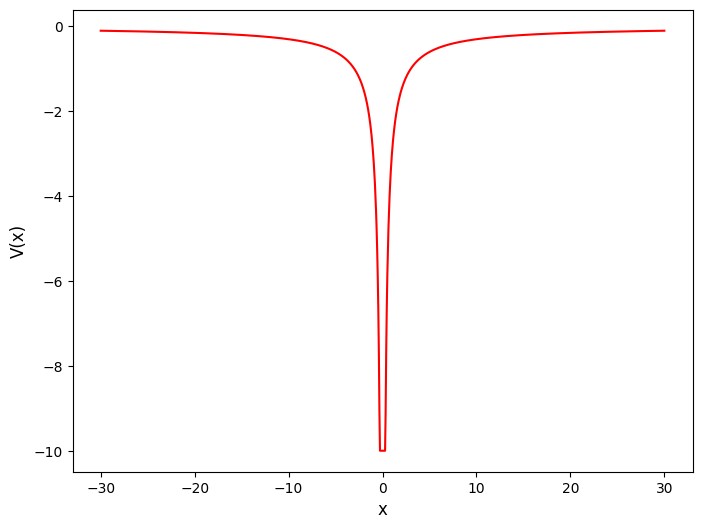

In [3]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

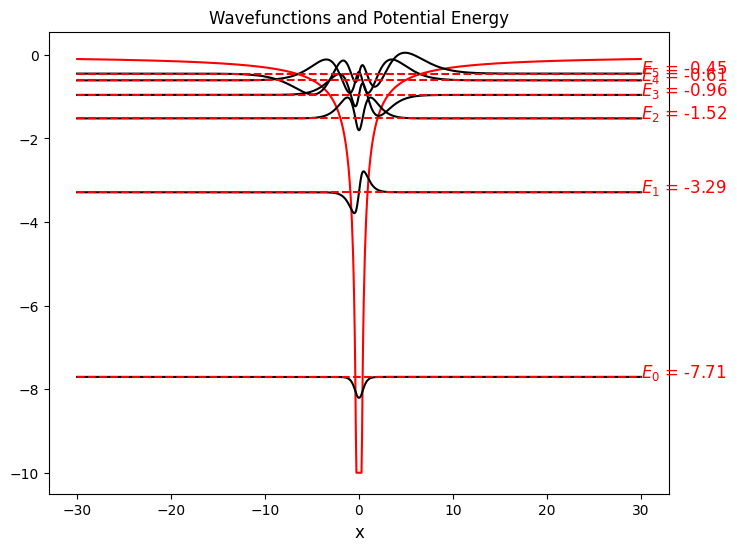

In [4]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 6, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)])

In this case, we simulate 1/r potential, which is similar to gauss's law. However, the user need to remember that this is 1D case and it still different from 3D case. Besides, to prevent negative infinity point (sigularity) in simulation, we truncate the potention to some value. Similar to hydrogen atom, the energy level difference is large when n is small. As n increase the energy level difference would decrease. 

# 1/r potential train

In [11]:
""" setting """
m = 1
h_bar = 1

x = np.linspace(-50, 50, 3000) # cm
x0_train = [-10.0, -5.0, 0.0, 5.0, 10.0]

def V_fun(x:np.ndarray):
    V = np.zeros_like(x)
    for x0 in x0_train:
        V += potential.inverse_r_potential(x=x, x0 = x0, V1 = 3.0, V0 = 0.0, V_threshold = -10, n=1)
    return V

<Axes: xlabel='x', ylabel='V(x)'>

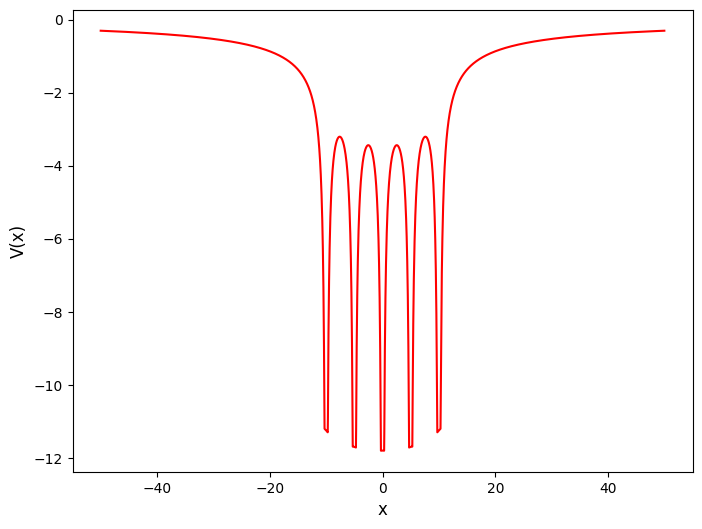

In [12]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

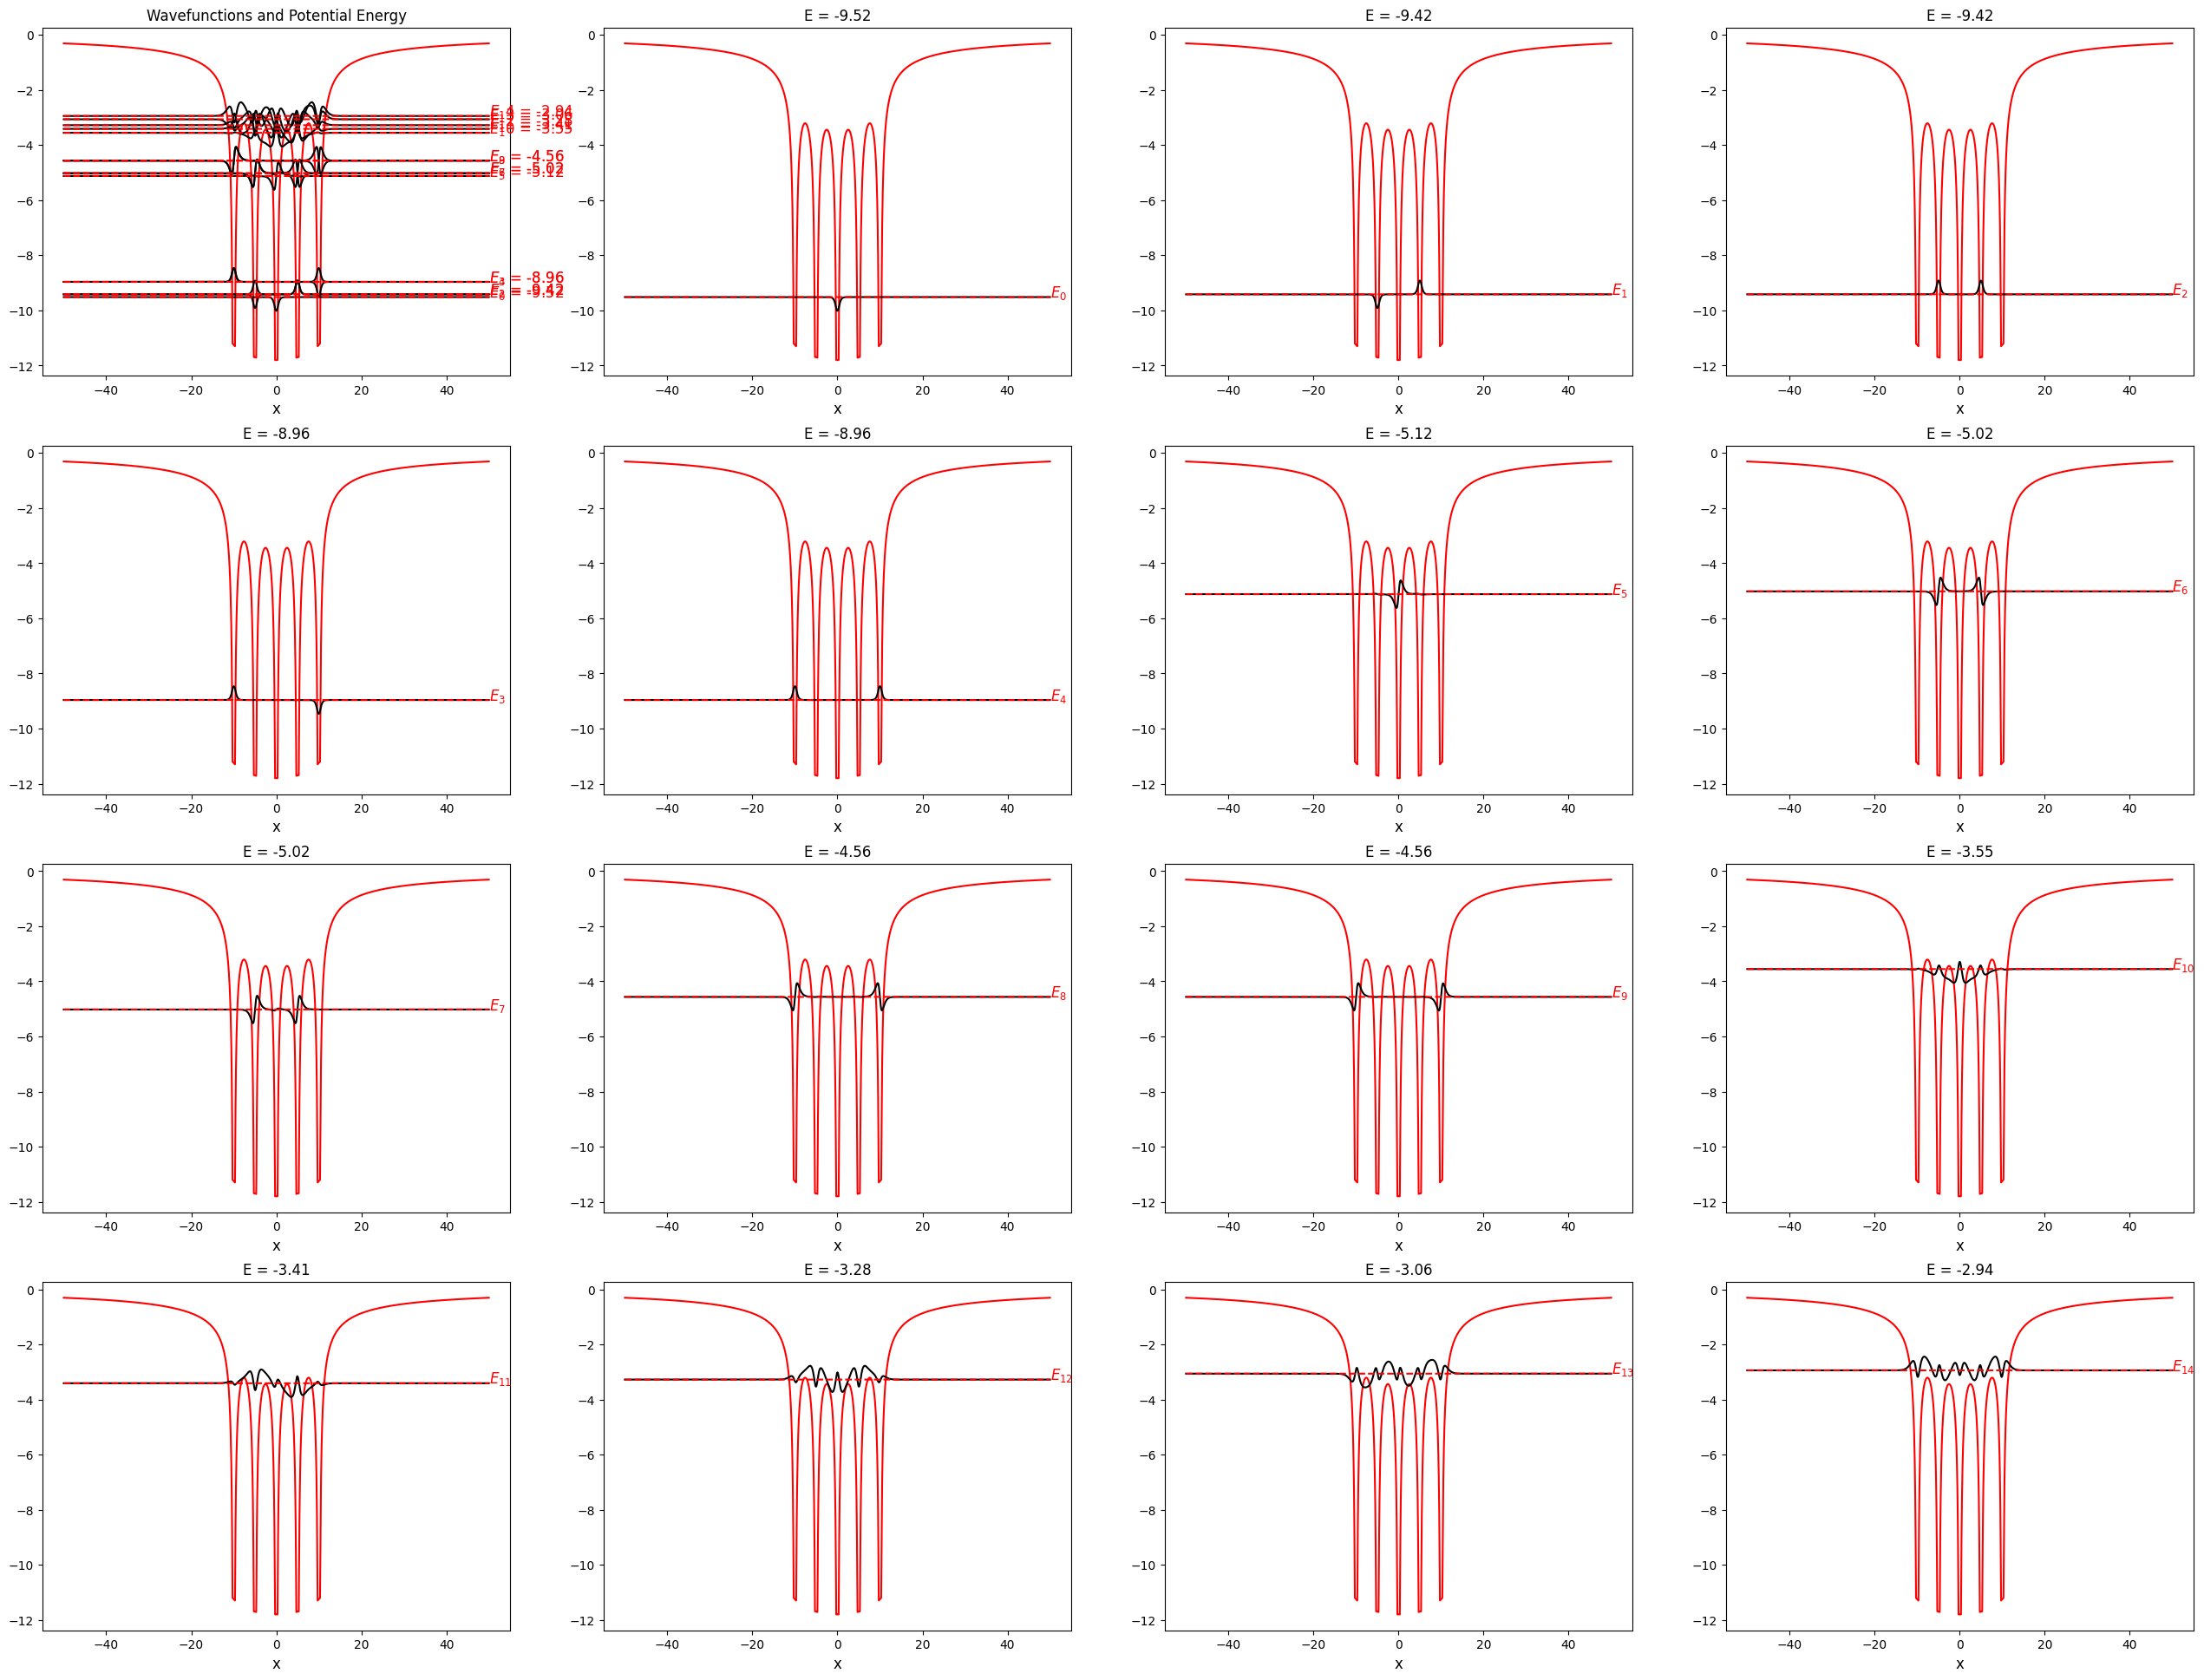

In [13]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 15, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(4, 4, figsize=(8*4, 6*4))
ax = ax.flatten()
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)], ax = ax[0])
for ii in range(15):
    solver1D.plot_wavefunctions_and_potential(x, [E[ii]], [Psis[ii]], V_fun(x), labels = ['$E_{'+f'{ii}'+'}$',], ax = ax[ii+1], title=f'E = {E[ii]:.2f}')

In this case, we simulate a train of 5 1/r potential energy. In the 1st figure, it is obvious that there are three group of energies, 0~4, 5~9, and 10~14. These groups correspond to the energy split of E0, E1, and E2 in single 1/r potential energy. For n = 0~4 cases, the wave functions that the electron is still be bounded by a singel nucleus. As n increases, the total energy is larger than the potential well of a single nucleus. The wave function is not bounded in a single nucleus but distribtuted over five nucleus.


# 1/r potential train 2 

In [8]:
""" setting """
m = 1
h_bar = 1

x = np.linspace(-50, 50, 5000) # cm
x0_train = [-30.0, -25.0, -20.0, -15.0, -10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]

def V_fun(x:np.ndarray):
    V = np.zeros_like(x)
    for x0 in x0_train:
        V += potential.inverse_r_potential(x=x, x0 = x0, V1 = 3.0, V0 = 0.0, V_threshold = -10, n=1)
    return V

<Axes: xlabel='x', ylabel='V(x)'>

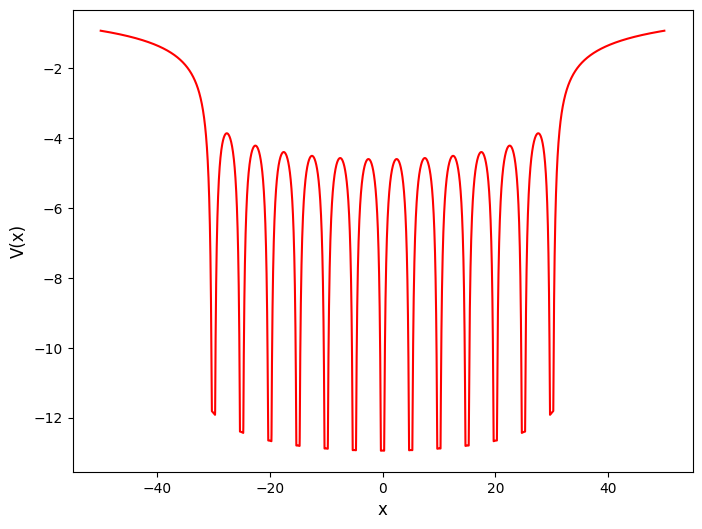

In [9]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

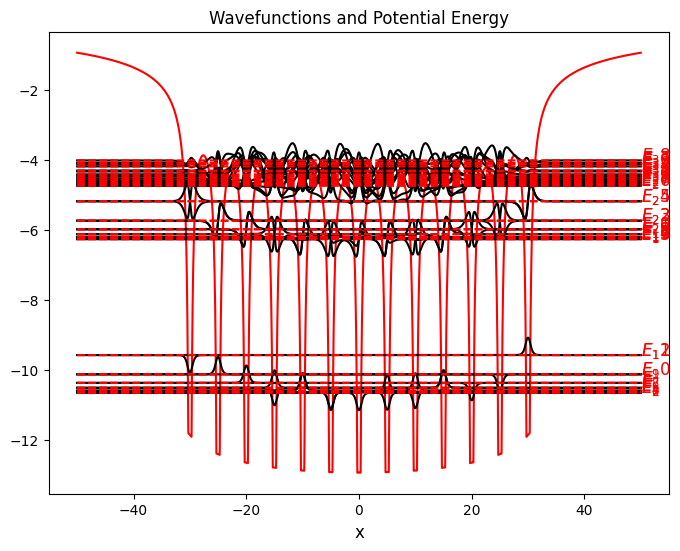

In [10]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 39, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)])

In this case, we add more 1/r potential well (13 nucleus). There still three gourps of energy level, correspoinding to energy splits of E0, E1, and E2 in single 1/r potential well. It is obvious that as the number of potential well increase, the energy level density become densor and like a energy band. That's why the scientist would use energy band to describe a crystal.